A little notebook to help visualise the official numbers for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

The data is dynamically loaded from: https://github.com/CSSEGISandData/COVID-19

Maybe switch to: https://data.humdata.org/dataset/5dff64bc-a671-48da-aa87-2ca40d7abf02

In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from jhu_helpers import *

In [3]:
jhu = aggregte_jhu_by_state(*get_jhu_data())

In [4]:
#jhu.confirmed.columns.tolist() # print a list of all countries in the data set

In [5]:
# look at recent numbers from highly affected countries
get_aggregate_top_n(jhu.confirmed)

Country/Region,US,Italy,Spain,China,Germany,France,Iran,United Kingdom,Switzerland,Turkey,Belgium,Netherlands,Austria,"Korea, South",Canada,Portugal,Brazil,Israel,Norway
Date,,,,,,,,,,,,,,,,,,,
2020-03-27,101657,86498,65719,81897,50871,33402,32332,14745,12928,5698,7284,8647,7657,9332,4682,4268,3417,3035,3755
2020-03-28,121478,92472,73235,81999,57695,38105,35408,17312,14076,7402,9134,9819,8271,9478,5576,5170,3904,3619,4015
2020-03-29,140886,97689,80110,82122,62095,40708,38309,19780,14829,9217,10836,10930,8788,9583,6280,5962,4256,4247,4284
2020-03-30,161807,101739,87956,82198,66885,45170,41495,22453,15922,10827,11899,11817,9618,9661,7398,6408,4579,4695,4445
2020-03-31,188172,105792,95923,82279,71808,52827,44605,25481,16605,13531,12775,12667,10180,9786,8527,7443,5717,5358,4641


In [6]:
# choose a random list of countries to plot
plot_countries = [
    'China',
    'Italy',
    #'Singapore',
    'Korea, South',
    'US',
    'France',
    'Germany',
]

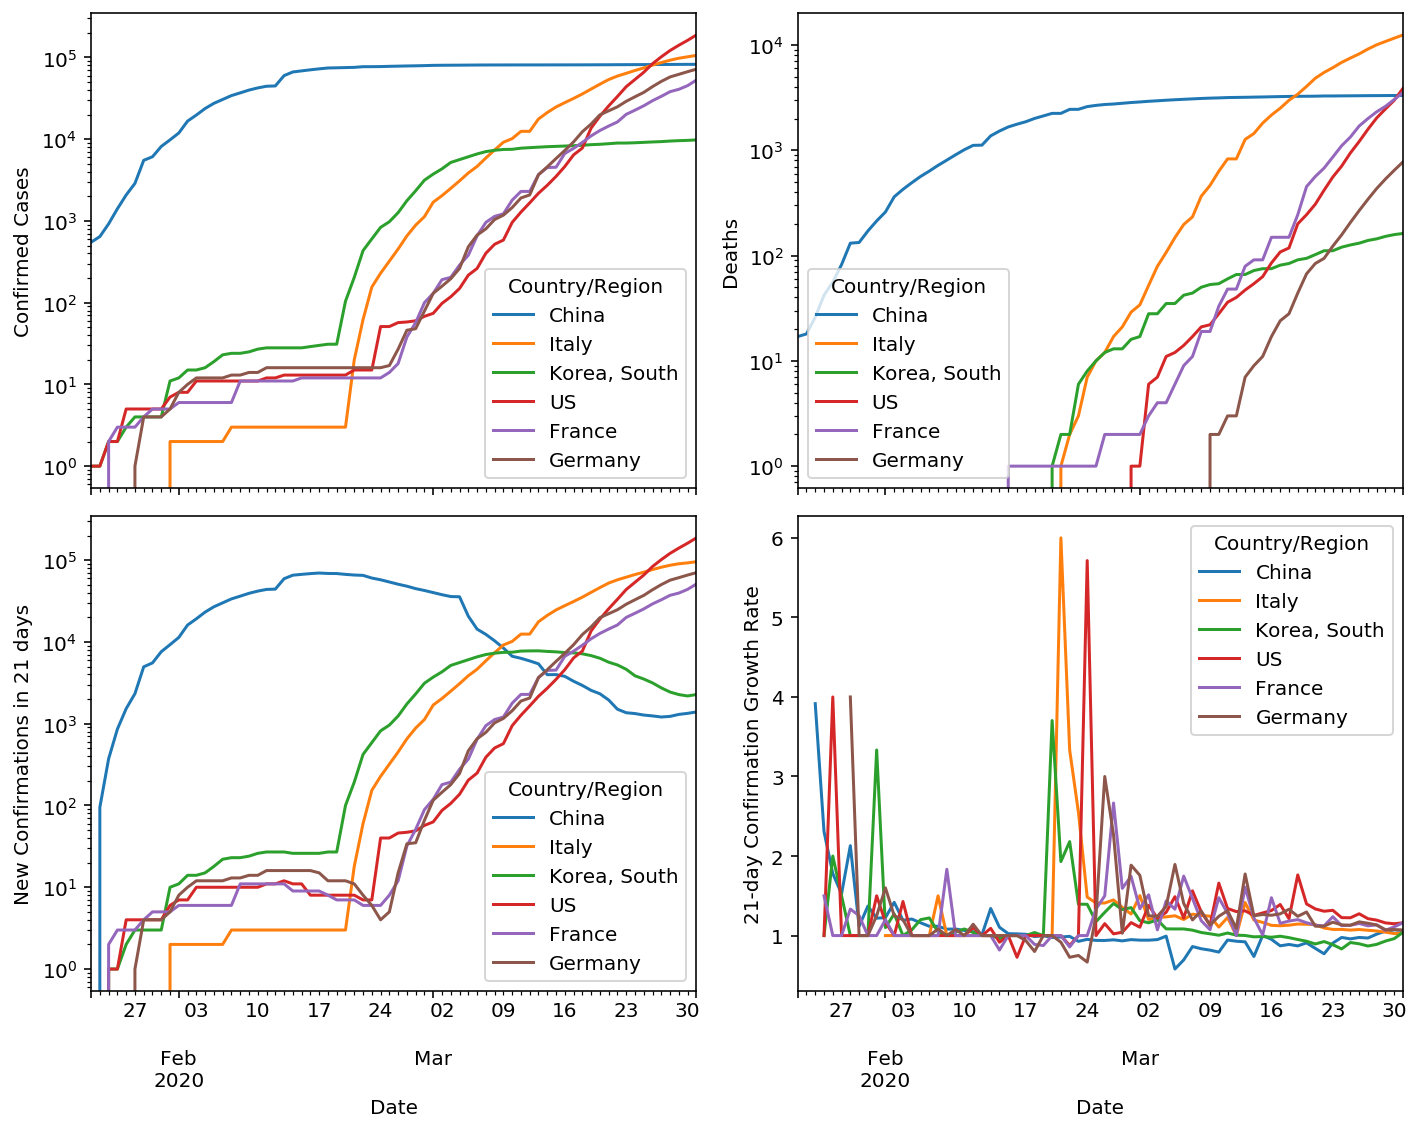

In [7]:
plt.close(1)
fig1, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, num=1)

jhu.confirmed[plot_countries].plot(ax=ax1[0,0], logy=True)
ax1[0,0].set_ylabel('Confirmed Cases')

jhu.deaths[plot_countries].plot(ax=ax1[0,1], logy=True)
ax1[0,1].set_ylabel('Deaths')

jhu.new_infected_21d[plot_countries].plot(ax=ax1[1,0], logy=True)
ax1[1,0].set_ylabel('New Confirmations in 21 days')

jhu.new_infection_rate_21d[plot_countries].plot(ax=ax1[1,1], logy=False)
ax1[1,1].set_ylabel('21-day Confirmation Growth Rate')

fig1.tight_layout()

In [8]:
# save the above figure
#fig1.savefig('sars-covid-19_timeseries.png')

### Calculate days since last doubling of confirmed cases

In [9]:
# confirmed 2d-array with last date in first row
confirmed = jhu.confirmed.reindex(
    # make sure we have one row for each day
    pd.date_range(jhu.index[0], jhu.index[-1], freq='1d'),
    method='ffill',
    axis=0
).loc[::-1].values

days_since_doubling = np.empty(confirmed.shape)
for i in range(len(confirmed)):
    days_since_doubling[i]  = (confirmed < confirmed[i] / 2).argmax(axis=0) - i

days_since_doubling[days_since_doubling < 0] = np.nan

days_since_doubling = pd.DataFrame(
    days_since_doubling, 
    index=jhu.index[::-1], 
    columns=jhu.confirmed.columns
).sort_index()

days_since_doubling.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-27,4.0,5.0,5.0,4.0,7.0,2.0,5.0,6.0,5.0,5.0,...,2.0,4.0,4.0,6.0,5.0,7.0,9.0,8.0,3.0,7.0
2020-03-28,5.0,6.0,6.0,5.0,6.0,3.0,5.0,6.0,5.0,6.0,...,3.0,5.0,4.0,7.0,4.0,8.0,9.0,7.0,3.0,2.0
2020-03-29,6.0,6.0,6.0,5.0,4.0,4.0,6.0,7.0,6.0,7.0,...,3.0,5.0,4.0,8.0,4.0,9.0,9.0,7.0,4.0,3.0
2020-03-30,5.0,7.0,6.0,6.0,5.0,5.0,5.0,7.0,6.0,7.0,...,4.0,6.0,5.0,9.0,5.0,10.0,9.0,8.0,4.0,4.0
2020-03-31,6.0,8.0,6.0,7.0,6.0,6.0,5.0,6.0,7.0,8.0,...,4.0,7.0,5.0,7.0,5.0,11.0,10.0,6.0,5.0,5.0


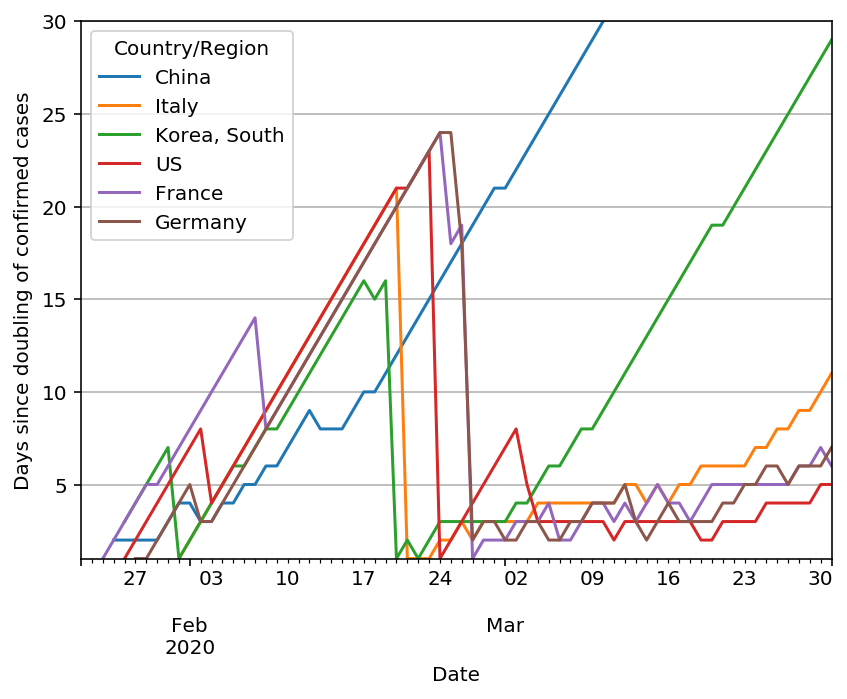

In [10]:
plt.close(2)
fig2, ax2 = plt.subplots(figsize=(6,5), sharex=True, num=2)

days_since_doubling[plot_countries].plot(ax=ax2, logy=False)
ax2.set_ylim([1,30])
ax2.grid(axis='y')
ax2.set_ylabel('Days since doubling of confirmed cases')
fig2.tight_layout()